### Preparations

1. Downloading the [Galaxy10 Dataset](https://astronn.readthedocs.io/en/latest/galaxy10sdss.html)

In [1]:
!wget -c https://www.astro.utoronto.ca/~bovy/Galaxy10/Galaxy10.h5

--2023-02-28 16:52:32--  https://www.astro.utoronto.ca/~bovy/Galaxy10/Galaxy10.h5
Resolving www.astro.utoronto.ca (www.astro.utoronto.ca)... 128.100.89.92
Connecting to www.astro.utoronto.ca (www.astro.utoronto.ca)|128.100.89.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 210234548 (200M)
Saving to: ‘Galaxy10.h5’

Galaxy10.h5         100%[===================>] 200.50M  13.9MB/s    in 17s     

2023-02-28 16:52:49 (12.1 MB/s) - ‘Galaxy10.h5’ saved [210234548/210234548]



2. Loading the galaxy images & labels from the downloaded file
3. Prepare image data (grayscale, crop, normalize)
4. Shuffle images & labels the same way

In [2]:
import h5py
import numpy as np

# Get galaxies, ref.: https://astronn.readthedocs.io/en/latest/galaxy10sdss.html
with h5py.File('Galaxy10.h5', 'r') as F:
  labels = np.array(F['ans'])
  images = np.array(F["images"])

# turn color into grayscale
images = images.mean(axis=-1, keepdims=True)
# crop the images 64x64 pixels
images = images[:, 2:66, 2:66, :]
# normalize intensity from 0...255 to 0...1.0
images = images.astype(np.float32) / 255.

# shuffle once
shuffle_idx = np.random.default_rng(seed=123).permutation(len(images))
images = images[shuffle_idx, ...]
labels = labels[shuffle_idx, ...]

# show shape
print(f"{images.shape=} {labels.shape=}")

images.shape=(21785, 64, 64, 1) labels.shape=(21785,)


5. Two plotting helpers `show_galaxies` and `show_confusion` with usage example

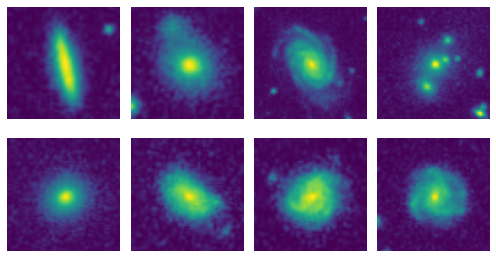

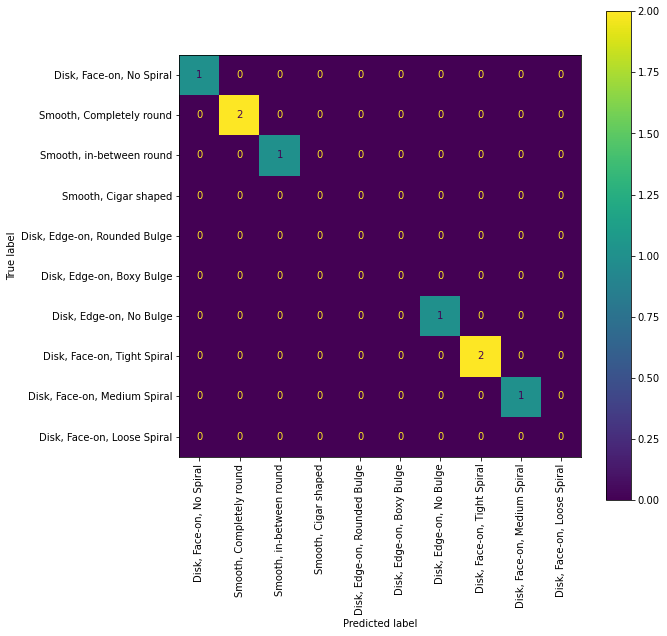

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline

def show_galaxies(images, ncols=4):
  """
  shows the given `images`
    optionally the number of columns (`ncols`) can be adjusted
  """
  assert 0 < ncols == int(ncols)
  n = len(images)
  nrows = -(-n // ncols) # ceil integer  division
  fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(7, 4))

  for img, ax in zip(images, axes.ravel()):
    ax.imshow(img)
    ax.axis('off')
  fig.tight_layout()

label_names = [
  "Disk, Face-on, No Spiral",
  "Smooth, Completely round",
  "Smooth, in-between round",
  "Smooth, Cigar shaped",
  "Disk, Edge-on, Rounded Bulge",
  "Disk, Edge-on, Boxy Bulge",
  "Disk, Edge-on, No Bulge",
  "Disk, Face-on, Tight Spiral",
  "Disk, Face-on, Medium Spiral",
  "Disk, Face-on, Loose Spiral",
]

def show_confusion(true_labels, predicted_labels, normalize=None):
  """
  shows the confusion matrix for the given `true_labels` and `predicted_labels`
    optionally can `normalize` for either "true" or "pred"icted label, or even globally ("all")
  """
  fig, axs = plt.subplots(figsize=(9, 9))
  ConfusionMatrixDisplay(
      confusion_matrix(
        y_true=true_labels,
        y_pred=predicted_labels,
        labels=np.arange(len(label_names)),
        normalize=normalize
      ),
      display_labels=label_names,
  ).plot(ax=axs, xticks_rotation="vertical")


# plot first 8 galaxies
show_galaxies(images[:8])

# plot a "perfect" confusion matrix for the first 8 galaxies
show_confusion(labels[:8], labels[:8])


## Primary Task:
- Train a neural network to classify the galaxy image’s shapes
- Invest some time into optimizing your network’s performance

## Questions:
1. How do you measure your network’s performance?
   - What is your reason for this choice?
   - What other good choices are there?
2. What makes Class 5 (Disk, Edge-on, Boxy Bulge) stand out?
   - How can this be addressed?
3. Find the galaxy images that your network performs best(worst) with. Explain why this is the case.

## Your solution